In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip './drive/My Drive/nlp/NLP.zip'

Archive:  ./drive/My Drive/nlp/NLP.zip
  inflating: news_test.json          
  inflating: news_train.json         
  inflating: samplesubmissionNLP.csv  


unzip the file from the drive to colab workspace

In [0]:

train_f=open('news_train.json','r')

In [0]:

from pathlib import Path
p=Path('.')


In [0]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
df=pd.read_json('news_train.json',lines=True)

use pandas to read the json file

In [0]:
df.head() #by default prints the first 5  lines of dataset

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [0]:
classes=df.groupby('category')
print(classes.size()) #look at the categories and sizes of each

category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4225
BUSINESS           5268
COLLEGE            1144
COMEDY             4584
CRIME              3206
CULTURE & ARTS      695
DIVORCE            2195
EDUCATION          1004
ENTERTAINMENT     15496
ENVIRONMENT         847
FIFTY              1401
FOOD & DRINK       4428
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      2610
IMPACT             3131
LATINO VOICES      1129
MEDIA              2815
MONEY               273
PARENTING          5599
PARENTS            3955
POLITICS          32739
QUEER VOICES       5852
RELIGION           2556
SCIENCE            1836
SPORTS             4622
STYLE              2254
STYLE & BEAUTY     4527
TASTE              2096
TECH               1648
THE WORLDPOST      3664
TRAVEL             6706
WEDDINGS           2179
WEIRD NEWS         2670
WELLNESS          10837
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          2579
dtype: 

In [0]:
df.category = df.category.map(lambda x: "WORLDPOST" if x == "THE WORLDPOST" else x)

In [0]:
df.category = df.category.map(lambda x: "GREEN" if x == "ENVIRONMENT" else x)

In [0]:
df.category = df.category.map(lambda x: "PARENTS" if x == "PARENTING" else x)

merging the similar categories as mentioned in the prob statement

In [0]:
classes=df.groupby('category')
print(classes.size())

category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4225
BUSINESS           5268
COLLEGE            1144
COMEDY             4584
CRIME              3206
CULTURE & ARTS      695
DIVORCE            2195
EDUCATION          1004
ENTERTAINMENT     15496
FIFTY              1401
FOOD & DRINK       4428
GOOD NEWS          1398
GREEN              3469
HEALTHY LIVING     6694
HOME & LIVING      2610
IMPACT             3131
LATINO VOICES      1129
MEDIA              2815
MONEY               273
PARENTS            9554
POLITICS          32739
QUEER VOICES       5852
RELIGION           2556
SCIENCE            1836
SPORTS             4622
STYLE              2254
STYLE & BEAUTY     4527
TASTE              2096
TECH               1648
TRAVEL             6706
WEDDINGS           2179
WEIRD NEWS         2670
WELLNESS          10837
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          6243
dtype: int64


In [0]:
df['text']=df.headline+' '+df.short_description

we will be training our model using the headline and short description given in the json file-- so make a new entry of 'text' 

In [0]:
df.head() #look at first 5 rows

,authors,category,date,headline,link,short_description,text
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


In [0]:
text=df['text']

In [0]:
catg=df['category']

In [0]:
data=(TextList.from_df(df,cols=['text'])
     .split_by_rand_pct(valid_pct=0.1)
     .label_from_df(cols=['category'])
     .databunch())


make the text databunch using the data block api-- we use from_df-- for the pandas df we made and we specify the col 'text' to be used as data

split into validation set from this data(10 percent)

label from the 'category'

In [0]:
data.show_batch() #look at the data

text,target
"xxbos xxmaj sunday xxmaj roundup xxmaj this week the nation watched as the # nevertrump movement folded faster than one of the presumptive nominee 's beachfront developments . xxmaj as many tried to explain away xxmaj trump 's reckless , racist extremism , a few put principle over party . xxmaj the wife of former xxmaj republican xxmaj senator xxmaj bob xxmaj bennett , who died on xxmaj may 4",POLITICS
"xxbos xxmaj disconnect : a xxmaj new xxmaj movie xxmaj sounds xxmaj the xxmaj alarm xxmaj about xxmaj our xxmaj hyper - xxmaj connected xxmaj lives xxmaj in the xxunk , xxmaj benjamin xxmaj xxunk , still a long way from being prime minister , wanted to wake people up to the plight of the xxmaj british working class . xxmaj the alarm he sounded was n't delivered in a",WELLNESS
"xxbos xxmaj mommy xxmaj confidential : xxmaj soleil xxmaj moon xxmaj frye xxmaj reveals xxmaj her ' xxmaj aha ' xxmaj mom xxmaj moment , the xxmaj one xxmaj item xxmaj always in xxmaj her xxmaj bag and the xxmaj art of xxmaj imperfect xxmaj parenting xxmaj xxunk xxmaj moon xxmaj frye may be remembered by millions for her role as xxup tv 's iconic xxmaj xxunk xxmaj xxunk ,",PARENTS
"xxbos xxmaj weekend xxmaj roundup : xxmaj mutiny xxmaj against the xxmaj status xxmaj quo xxmaj at this stage in the xxmaj american election season it is far from clear , despite early wins and losses , who the presidential nominees will be . xxmaj as xxmaj julian xxmaj xxunk writes , what is certain is that xxmaj america , like much of xxmaj europe , is experiencing a mutiny",WORLDPOST
"xxbos xxmaj the xxmaj latest xxmaj assault on the xxmaj affordable xxmaj care xxmaj act : xxmaj an xxup hiv - xxmaj positive , 34-year - xxmaj old xxmaj man 's xxmaj perspective i would not be here today if it was n't for the free , quality health care i was given in the form of xxmaj medicaid . i support the xxup aca and i advocate for a",QUEER VOICES


the data has been tokenized and numericalized

Tokenization-
contractions like 'didnt' separated to two words,
all lower case letters, several special tokens(xx...)

Numericalisation-
text converted to intergers by creating a list of all words used(vocab)-- with ones appearing at least twice-- with max vocab size of 60,000 and those which do not get included are replaced by xx

In [0]:
data.save('lmdata.pkl')

In [0]:
data=load_data(p,'lmdata.pkl',bs=48)

In [0]:
from google.colab import files
files.download(p/'lmdata.pkl')

In [0]:
dftst=pd.read_json('news_test.json',lines=True) #read test json also using pandas dataframe

In [0]:
dftst['text']=dftst.headline+' '+dftst.short_description

for our language model we use  the text given in both the test and train datasets to increase accuracy by widening the dataset. 

In [0]:
df_lm=df
df_lm.append(dftst) # make a separate dataframe with both the df and df_tst for lang model

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,authors,category,date,headline,link,short_description,text
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...
5,Ron Dicker,ENTERTAINMENT,2018-05-26,Morgan Freeman 'Devastated' That Sexual Harass...,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",Morgan Freeman 'Devastated' That Sexual Harass...
6,Ron Dicker,ENTERTAINMENT,2018-05-26,Donald Trump Is Lovin' New McDonald's Jingle I...,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right.",Donald Trump Is Lovin' New McDonald's Jingle I...
7,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Amazon Prime That’s New This ...,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.,What To Watch On Amazon Prime That’s New This ...
8,Andy McDonald,ENTERTAINMENT,2018-05-26,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ...",Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Hulu That’s New This Week,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...,What To Watch On Hulu That’s New This Week You...


In [0]:
data_lm=(TextList.from_df(df_lm,cols=['text'])
        .split_by_rand_pct(0.1)
        .label_for_lm()
        .databunch(bs=48))

We create a data bunch with the text of df_lm with random validation set of 10percent and no labels. We are trying to build a learner which can predict the next word in the sentence, so the next word of the sentence becomes the target(self supervised learning).

In [0]:
data_lm.save('data_lm.pkl')

In [0]:
import os
os.stat(p/'drive/My Drive/nlp/data_lm.pkl')

os.stat_result(st_mode=33152, st_ino=24, st_dev=71, st_nlink=1, st_uid=0, st_gid=0, st_size=2097152, st_atime=1562211040, st_mtime=1562211029, st_ctime=1562211029)

In [0]:
from shutil import copyfile

copyfile('data_lm.pkl', p/'drive/My Drive/nlp/data_lm.pkl')

PosixPath('drive/My Drive/nlp/data_lm.pkl')

In [0]:
from google.colab import files
files.download('data_lm.pkl')

In [0]:
data_lm=load_data(p,'data_lm.pkl',bs=48)

In [0]:
from google.colab import files
files.download(p/'data_lm.pkl')

In [0]:
learn=language_model_learner(data_lm,AWD_LSTM,drop_mult=0.3)

we create a learner with the LSTM architecture

drop_mult--dropout-- reduce regularization-to avoid underfitting-- with value=1 was underfitting

In [0]:
learn.save('lm_untrained')

In [0]:
copyfile(p/'models/lm_untrained.pth', p/'drive/My Drive/nlp/lm_untrained.pth')

PosixPath('drive/My Drive/nlp/lm_untrained.pth')

In [0]:
os.stat(p/'models/lm_1.pth')

os.stat_result(st_mode=33188, st_ino=10486695, st_dev=46, st_nlink=1, st_uid=0, st_gid=0, st_size=308711523, st_atime=1562212650, st_mtime=1562212650, st_ctime=1562212650)

In [0]:
os.stat(p/'drive/My Drive/nlp/lm_1.pth')

os.stat_result(st_mode=33152, st_ino=28, st_dev=71, st_nlink=1, st_uid=0, st_gid=0, st_size=308711523, st_atime=1562212667, st_mtime=1562212653, st_ctime=1562212650)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


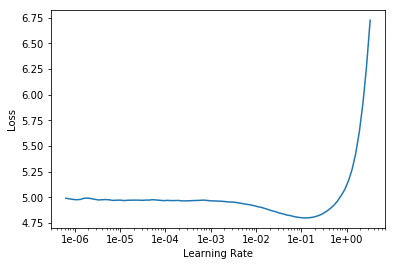

In [0]:
learn.lr_find()
learn.recorder.plot()

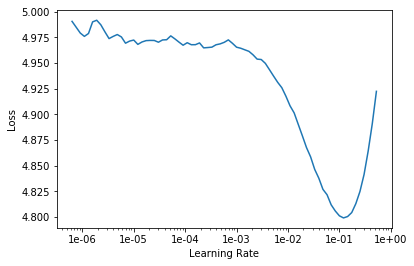

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1,1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,3.796017,3.627814,0.402209,17:38


In [0]:
learn.save('lm_1')

In [0]:
copyfile(p/'models/lm_1.pth', p/'drive/My Drive/nlp/lm_1.pth')

PosixPath('drive/My Drive/nlp/lm_1.pth')

In [0]:
files.download(p/'models/lm_1.pth')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


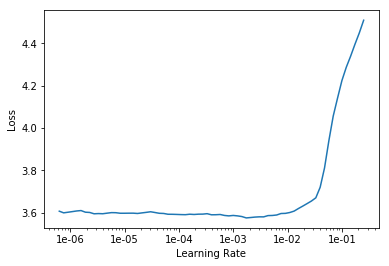

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

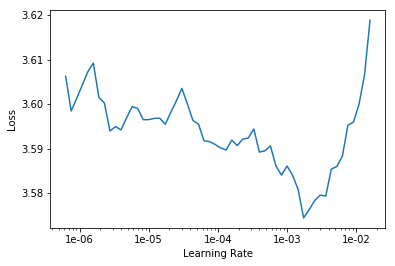

In [0]:
learn.recorder.plot(skip_end=30)

In [0]:
learn.fit_one_cycle(5,2e-5)
learn.save('lm_2')

epoch,train_loss,valid_loss,accuracy,time
0,3.518957,3.556757,0.408536,20:14
1,3.462614,3.500645,0.414409,20:15
2,3.420472,3.475075,0.417100,20:16
3,3.408247,3.465227,0.418249,20:15
4,3.415288,3.463671,0.418429,20:15


In [0]:
copyfile(p/'models/lm_2.pth', p/'drive/My Drive/nlp/lm_2.pth')

PosixPath('drive/My Drive/nlp/lm_2.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


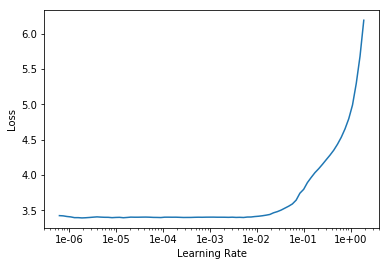

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
files.download(p/'models/lm_2.pth')

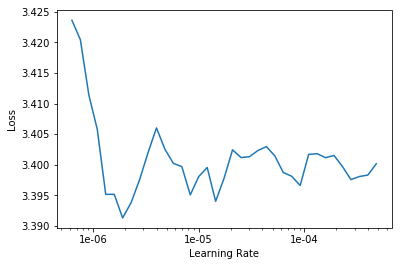

In [0]:
learn.recorder.plot(skip_end=50)

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(3,1e-6)
learn.save('lm_3')

epoch,train_loss,valid_loss,accuracy,time
0,3.403453,3.462984,0.418487,20:15
1,3.407896,3.462101,0.418619,20:15
2,3.393677,3.461957,0.418614,20:15


In [0]:
copyfile(p/'models/lm_3.pth', p/'drive/My Drive/nlp/lm_3.pth')

PosixPath('drive/My Drive/nlp/lm_3.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


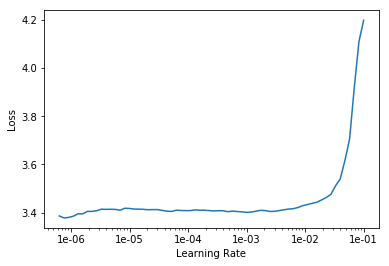

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=20)

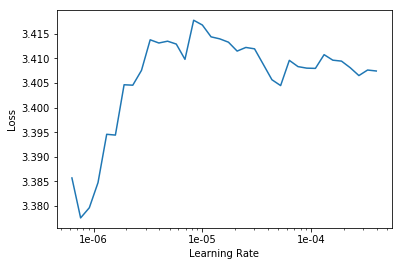

In [0]:
learn.recorder.plot(skip_end=50)

In [0]:
learn.fit_one_cycle(2,2e-05)

epoch,train_loss,valid_loss,accuracy,time
0,3.394814,3.448826,0.419975,20:14
1,3.369779,3.442630,0.420546,20:15


In [0]:
learn.save('lm_4')


In [0]:
print('\n'.join(learn.predict('the man was killed',40,temperature=0.7) for _ in range(2)))

the man was killed in a Vehicle Bomb Month After Car Crashes After Car Crash The officer died . xxbos The Foundation To Invest In The Future
the man was killed in Paris Attacks , Part 2 , of ISIS , a car bomb , and a bomb that hit a Russian car in Russia . It was believed that Syrian Army


check our lang model learner 
no of words in predicted sentence=40
temperature- (0-1) lower the value, less the randomness in predicted text
we predict 2 sentences

In [0]:
copyfile(p/'models/lm_4.pth', p/'drive/My Drive/nlp/lm_4.pth')

PosixPath('drive/My Drive/nlp/lm_4.pth')

In [0]:
learn.save_encoder('fine_tuned_enc')

we save a *part* of the learner- the encoder whch converts the input into an intermediate state-- here we do not save the decoder-- which is tasked to create the output. We will use the encoded representation and use it for text classification.

In [0]:
copyfile(p/'models/fine_tuned_enc.pth', p/'drive/My Drive/nlp/fine_tuned_enc.pth')

PosixPath('drive/My Drive/nlp/fine_tuned_enc.pth')

In [0]:
data_clas=(TextList.from_df(df,cols=['text'],vocab=data_lm.vocab)
          .split_by_rand_pct(0.1)
          .label_from_df(cols=['category'])
          .databunch())

this is the language classifier-- now we use only the df from the train dataset and vocab from data_lm 
validation set is chosen randomly 10% of data
labels from the corr entry of 'category'



In [0]:
data_clas.save('data_clas.pkl')

In [0]:
copyfile('data_clas.pkl',p/'drive/My Drive/nlp/data_clas.pkl')

PosixPath('drive/My Drive/nlp/data_clas.pkl')

In [0]:
data_clas.show_batch() #data with labels and tokenized and numericalized

text,target
"xxbos xxmaj sunday xxmaj roundup xxmaj this week the nation came one step closer to giving itself over to the most dangerous and unstable potential leader in xxup u.s. history , as xxmaj donald xxmaj trump "" humbly "" accepted the xxmaj republican presidential nomination - so humbly , in fact , that he went on to claim that "" i alone can fix "" xxmaj america . xxmaj it",POLITICS
"xxbos xxmaj weekend xxmaj roundup : xxmaj laughing at xxmaj god xxmaj the first principle of an open society is not to let the intolerant define "" the territory of insult "" -- those areas off limits to criticism or ridicule . xxmaj but how does one define "" territory "" when media now crosses the boundaries of nations , cultures and civilizations ? \n \n xxmaj in the",WORLDPOST
"xxbos xxmaj weekend xxmaj roundup : xxmaj is xxmaj europe xxmaj xxunk ? xxmaj europe is facing divisive challenges on all fronts . xxmaj it is being torn within by xxunk attitudes toward the growing presence not only of xxmaj muslim immigrants , but also of citizens . xxmaj on xxmaj monday , demonstrators xxunk the streets of xxmaj dresden in support of "" xxmaj patriotic xxmaj europeans xxmaj against",WORLDPOST
"xxbos xxmaj sunday xxmaj roundup xxmaj this week , xxmaj ebola arrived in xxmaj new xxmaj york xxmaj city -- xxmaj america 's most crowded and most media - saturated metropolis . xxmaj so , as word spread on xxmaj thursday , so did the hysteria . xxmaj but thankfully , xxmaj ebola ( or "" xxmaj xxunk , "" as some xxunk it in honor of the infected doctor",POLITICS
"xxbos xxmaj when xxmaj it xxmaj comes to xxmaj disney 's 101 xxmaj dalmatians , the ' de xxmaj vil ' xxmaj is in the xxmaj details xxmaj it was actually xxmaj marc xxmaj davis ' masterful work on the xxmaj mistress of xxmaj all xxmaj evil for xxmaj sleeping xxmaj beauty that led to his being assigned xxmaj cruella de xxmaj vil . xxmaj but given that 101 xxmaj",ENTERTAINMENT


In [0]:
learn=text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

text classifier learner with lstm architecture


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


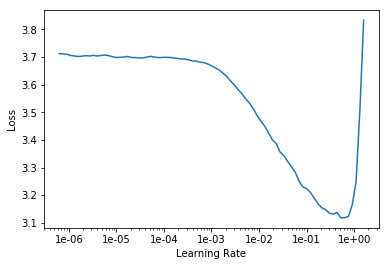

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.713065,1.390913,0.587858,04:59


In [0]:
learn.save('clas_1')

In [0]:
copyfile(p/'models/clas_1.pth',p/'drive/My Drive/nlp/clas_1.pth')

PosixPath('drive/My Drive/nlp/clas_1.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


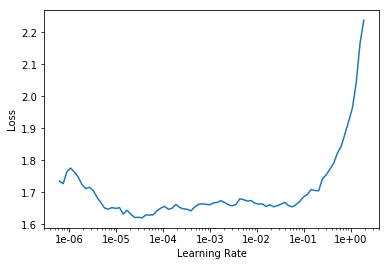

In [0]:
learn.lr_find()
learn.recorder.plot()

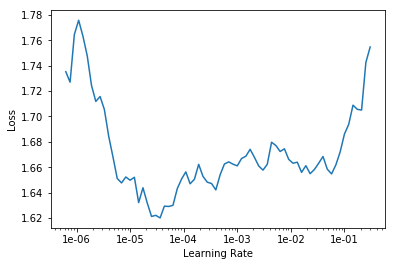

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.freeze_to(-2)# freeze last 2 layers-- helps with text classification
learn.fit_one_cycle(5,slice((3e-6)/2.6**4,3e-6))

epoch,train_loss,valid_loss,accuracy,time
0,1.648595,1.382284,0.590858,06:05
1,1.705804,1.381347,0.590564,06:01
2,1.675522,1.384200,0.593270,06:03
3,1.634181,1.385272,0.592211,05:42
4,1.650918,1.382412,0.592211,05:39


In [0]:
learn.save("clas_2")

In [0]:
copyfile(p/'models/clas_2.pth',p/'drive/My Drive/nlp/clas_2.pth')

PosixPath('drive/My Drive/nlp/clas_2.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


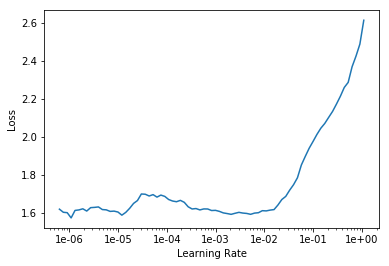

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

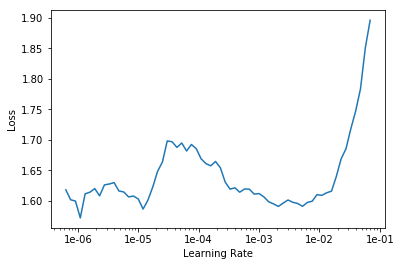

In [0]:
learn.recorder.plot(skip_end=20)

In [0]:
learn.fit_one_cycle(3,slice(1e-4/(2.6**4),1e-4),moms=(0.8,0.7)) #momentums=moms-decreased from normal

epoch,train_loss,valid_loss,accuracy,time
0,1.581368,1.333767,0.605447,11:59
1,1.531741,1.296433,0.620684,11:48
2,1.500785,1.285365,0.623448,13:19


In [0]:
learn.save('clas_3')

In [0]:
copyfile(p/'models/clas_3.pth',p/'drive/My Drive/nlp/clas_3.pth')

PosixPath('drive/My Drive/nlp/clas_3.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


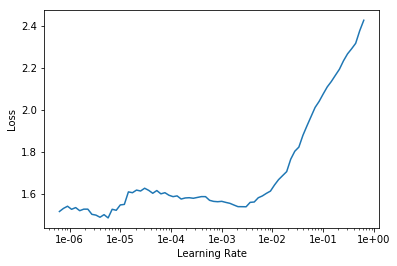

In [0]:
learn.lr_find()
learn.recorder.plot()

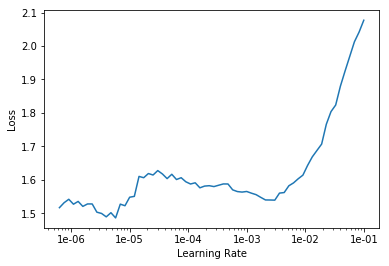

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(3,slice(1e-4/(2.6**4),1e-4),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.482066,1.266810,0.629331,12:27
1,1.442886,1.241715,0.635449,12:33
2,1.436373,1.240766,0.636155,13:05


In [0]:
learn.save('clas_4')

In [0]:
copyfile(p/'models/clas_4.pth',p/'drive/My Drive/nlp/clas_4.pth')

PosixPath('drive/My Drive/nlp/clas_4.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


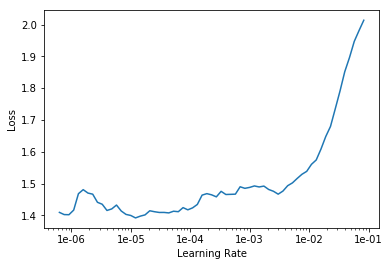

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

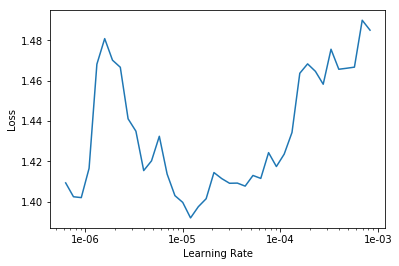

In [0]:
learn.recorder.plot(skip_end=40)

In [0]:
learn.fit_one_cycle(2,slice(5e-6/2.6**4,5e-6),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.436487,1.237910,0.636449,12:56
1,1.402370,1.236752,0.637390,13:31


In [0]:
learn.save('clas_5')

In [0]:
copyfile(p/'models/clas_5.pth',p/'drive/My Drive/nlp/clas_5.pth')

PosixPath('drive/My Drive/nlp/clas_5.pth')

In [0]:
pred=(learn.predict(dftst['text'][0])[0])
str(pred)

'PARENTS'

In [0]:
res=open(p/'drive/My Drive/nlp/res.txt','a+')

In [0]:
t=0
for i in dftst['text']:
  catg=learn.predict(i)[0]
  res.write(str(t)+','+str(catg))
  t+=1

In [0]:
res.close()